# Problem Statement

In [1]:
# I aim to predict customer satisfaction for an airline based on a dataset that includes customer feedback.
# The dataset contains a 'customer satisfaction' column with two classes: 'satisfied' and 'dissatisfied.'
# My objective in this project is to develop a binary classification model that accurately predicts customer satisfaction.
# I will perform data preprocessing, consider various machine learning algorithms, and evaluate model performance using appropriate metrics.
# The expected outcome is a predictive model that can help the airline enhance customer service and make informed business decisions.

# Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the datasets
df = pd.read_csv('Airline.csv')

In [5]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [6]:
# Describing the dataset
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.shape

(129880, 22)

In [8]:
# Information about Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [9]:
# checking null values
pd.isnull(df).sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
pd.isnull(df).sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
#converting age calumn's value into group
df['Age'].value_counts()

39    3681
25    3501
40    3203
44    3099
41    3081
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64

In [14]:
df['Age Group'] = df['Age'].apply(lambda x: 'Young Age' if x <= 40 else ('Middle Age' if x <= 50 else 'Old Age'))

In [15]:
df.drop(['Age'], axis=1, inplace=True)

In [16]:
df

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Age Group
0,satisfied,Loyal Customer,Personal Travel,Eco,265,0,0,0,2,2,...,3,3,0,3,5,3,2,0,0.0,Old Age
1,satisfied,Loyal Customer,Personal Travel,Business,2464,0,0,0,3,0,...,3,4,4,4,2,3,2,310,305.0,Middle Age
2,satisfied,Loyal Customer,Personal Travel,Eco,2138,0,0,0,3,2,...,2,3,3,4,4,4,2,0,0.0,Young Age
3,satisfied,Loyal Customer,Personal Travel,Eco,623,0,0,0,3,3,...,1,1,0,1,4,1,3,0,0.0,Old Age
4,satisfied,Loyal Customer,Personal Travel,Eco,354,0,0,0,3,4,...,2,2,0,2,4,2,5,0,0.0,Old Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,Personal Travel,Eco,1731,5,5,5,3,2,...,2,3,3,4,4,4,2,0,0.0,Young Age
129876,dissatisfied,disloyal Customer,Personal Travel,Business,2087,2,3,2,4,2,...,3,2,3,3,1,2,1,174,172.0,Old Age
129877,dissatisfied,disloyal Customer,Personal Travel,Eco,2320,3,0,3,3,3,...,4,4,3,4,2,3,2,155,163.0,Old Age
129878,dissatisfied,disloyal Customer,Personal Travel,Eco,2450,3,2,3,2,3,...,3,3,2,3,2,1,2,193,205.0,Old Age


In [17]:
df.dtypes

satisfaction                          object
Customer Type                         object
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Age Group                             object
dtype: obj

In [18]:
#Dropping the unwanted column
df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes','Gate location','Online boarding','Leg room service'], axis=1, inplace=True)

In [19]:
df

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Baggage handling,Checkin service,Cleanliness,Age Group
0,satisfied,Loyal Customer,Personal Travel,Eco,265,0,0,0,2,4,2,3,3,3,5,3,Old Age
1,satisfied,Loyal Customer,Personal Travel,Business,2464,0,0,0,0,2,2,3,4,4,2,3,Middle Age
2,satisfied,Loyal Customer,Personal Travel,Eco,2138,0,0,0,2,0,2,2,3,4,4,4,Young Age
3,satisfied,Loyal Customer,Personal Travel,Eco,623,0,0,0,3,4,3,1,1,1,4,1,Old Age
4,satisfied,Loyal Customer,Personal Travel,Eco,354,0,0,0,4,3,4,2,2,2,4,2,Old Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,Personal Travel,Eco,1731,5,5,5,2,5,2,2,3,4,4,4,Young Age
129876,dissatisfied,disloyal Customer,Personal Travel,Business,2087,2,3,2,2,1,1,3,2,3,1,2,Old Age
129877,dissatisfied,disloyal Customer,Personal Travel,Eco,2320,3,0,3,3,2,2,4,4,4,2,3,Old Age
129878,dissatisfied,disloyal Customer,Personal Travel,Eco,2450,3,2,3,3,2,2,3,3,3,2,1,Old Age


# Exploratory Data Analysis - EDA

In [20]:
df.columns

Index(['satisfaction', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Age Group'],
      dtype='object')

<Axes: xlabel='Online support', ylabel='satisfaction'>

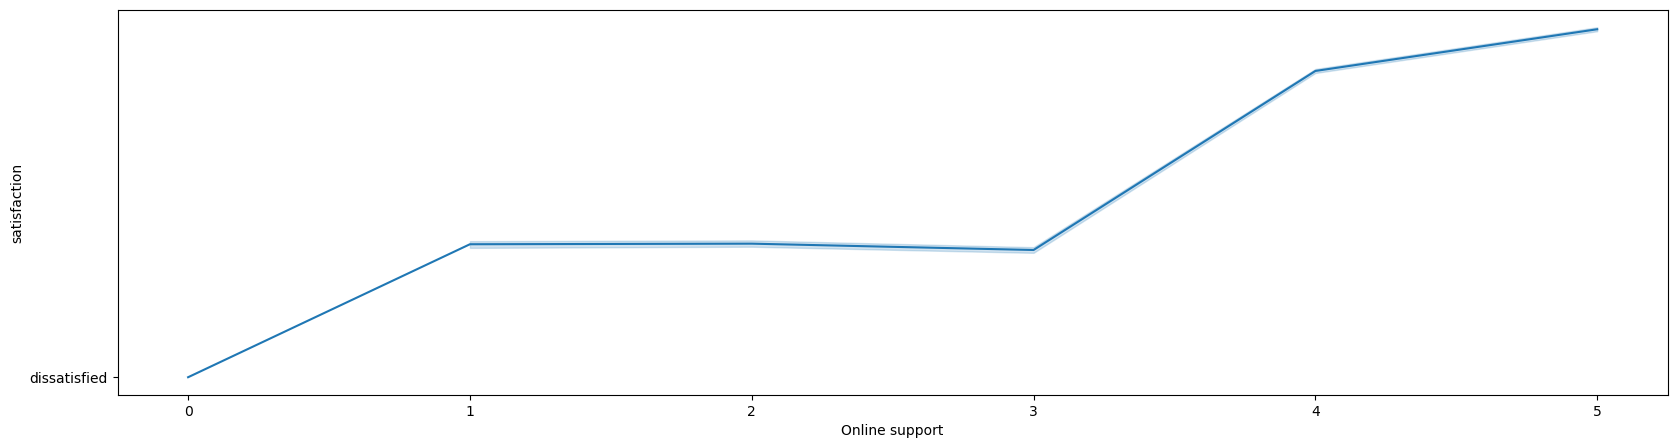

In [21]:
#Checking Customer Satisfaction On Online Support
fig, cx = plt.subplots(figsize=(20,5))
sns.lineplot(df,x="Online support",y="satisfaction",palette="muted")

<Axes: xlabel='Departure/Arrival time convenient', ylabel='satisfaction'>

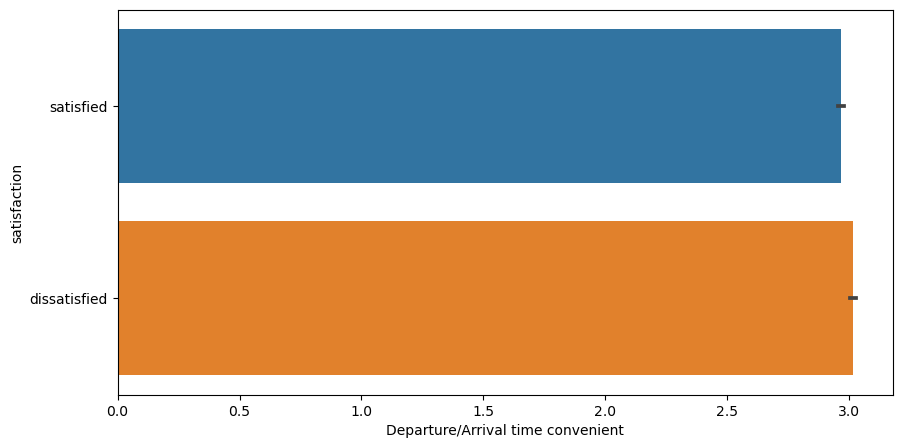

In [22]:
#Checking Customer Satisfaction On Departure/Arrival time convenient
fig, bx = plt.subplots(figsize=(10,5))
sns.barplot(df,x ="Departure/Arrival time convenient", y ="satisfaction")

<Axes: xlabel='Flight Distance', ylabel='count'>

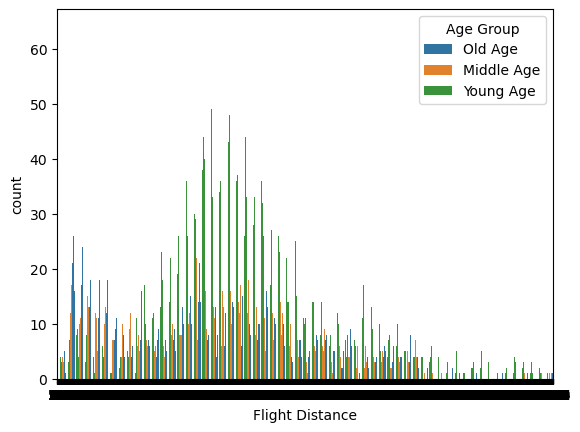

In [23]:
#Checking Flight Distance On Age Group
c=sns.countplot(data=df, x ="Flight Distance", hue="Age Group")
c

<Axes: xlabel='Customer Type', ylabel='count'>

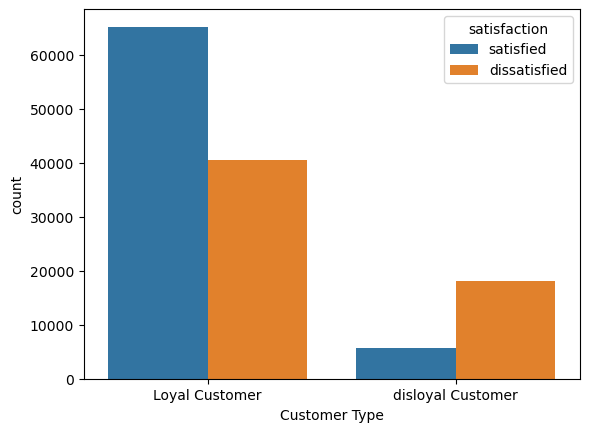

In [24]:
#Checking satisfaction On Customer Type
satisf = sns.countplot(data=df,x='Customer Type',hue='satisfaction')
satisf

<Axes: xlabel='Class', ylabel='satisfaction'>

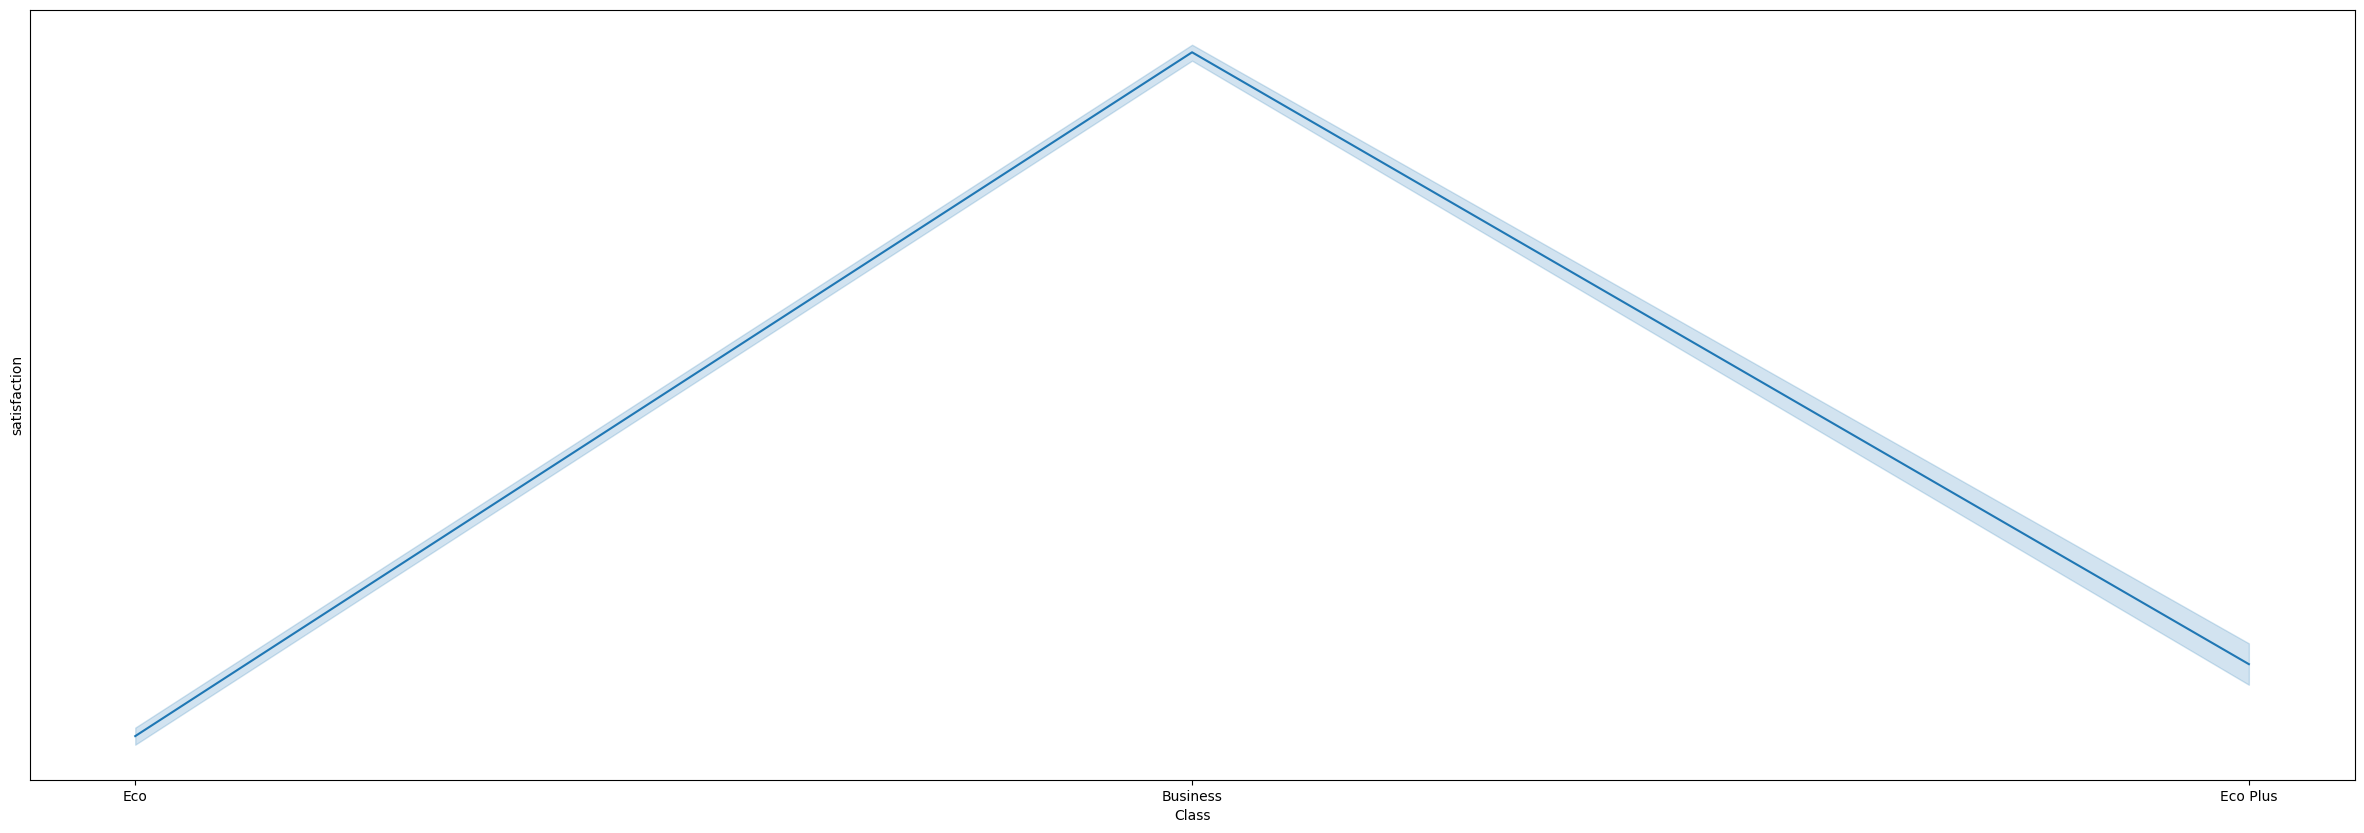

In [25]:
#Checking satisfaction On Class
plt.subplots(figsize=(30,10))
sns.lineplot(df,x="Class",y="satisfaction",palette="highlight")

<Axes: xlabel='satisfaction', ylabel='Age Group'>

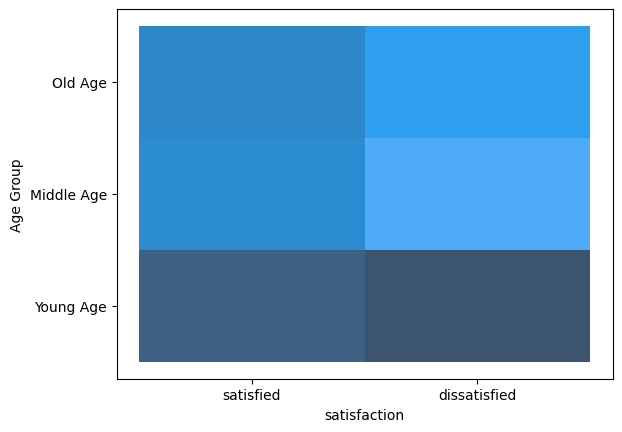

In [26]:
#Checking satisfaction On Age Group
sns.histplot(df,x="satisfaction",y="Age Group",palette="muted")

# Correlative Plot

In [27]:
corr_loan=df.corr()

In [28]:
corr_loan

,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Baggage handling,Checkin service,Cleanliness
Flight Distance,1.000000,-0.042476,0.001381,-0.004806,0.012314,-0.027344,-0.031860,-0.022326,-0.032422,0.019653,0.002531,0.009391
Seat comfort,-0.042476,1.000000,0.434945,0.716008,0.129152,0.426488,0.120153,0.211576,0.121183,0.118557,0.041265,0.108681
Departure/Arrival time convenient,0.001381,0.434945,1.000000,0.527575,-0.001558,0.077262,-0.000470,0.001853,0.060104,0.067201,0.062927,0.067021
Food and drink,-0.004806,0.716008,0.527575,1.000000,0.026077,0.367777,0.028503,0.041150,0.038578,0.036307,0.011912,0.033313
Inflight wifi service,0.012314,0.129152,-0.001558,0.026077,1.000000,0.253941,0.557548,0.601074,0.060854,0.038339,0.092402,0.038513
Inflight entertainment,-0.027344,0.426488,0.077262,0.367777,0.253941,1.000000,0.441844,0.321891,0.184083,0.117286,0.224130,0.109420
Online support,-0.031860,0.120153,-0.000470,0.028503,0.557548,0.441844,1.000000,0.617642,0.158006,0.102399,0.206641,0.095773
Ease of Online booking,-0.022326,0.211576,0.001853,0.041150,0.601074,0.321891,0.617642,1.000000,0.436439,0.398457,0.137896,0.418073
On-board service,-0.032422,0.121183,0.060104,0.038578,0.060854,0.184083,0.158006,0.436439,1.000000,0.530591,0.251037,0.551137
Baggage handling,0.019653,0.118557,0.067201,0.036307,0.038339,0.117286,0.102399,0.398457,0.530591,1.000000,0.241203,0.632047


<Axes: >

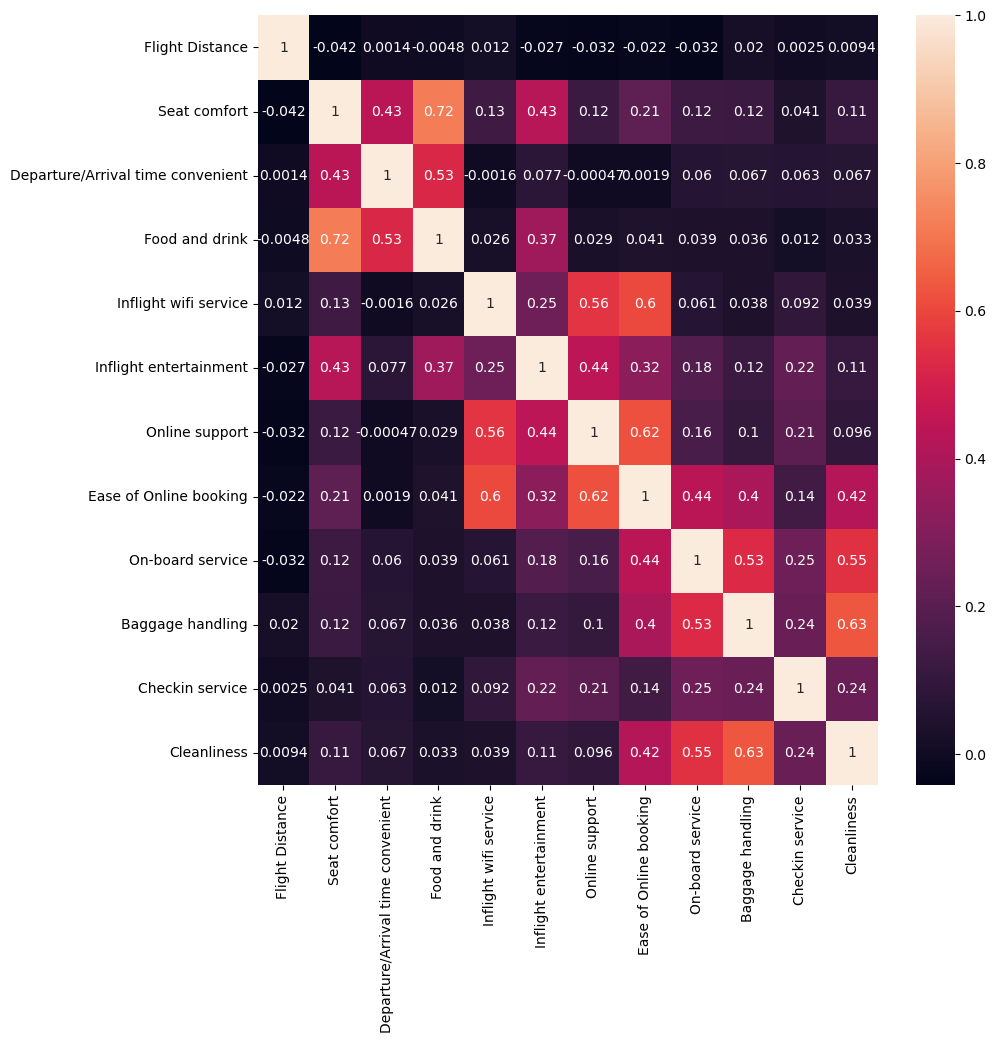

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_loan,annot=True)

# Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder = LabelEncoder()

In [32]:
df

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Baggage handling,Checkin service,Cleanliness,Age Group
0,satisfied,Loyal Customer,Personal Travel,Eco,265,0,0,0,2,4,2,3,3,3,5,3,Old Age
1,satisfied,Loyal Customer,Personal Travel,Business,2464,0,0,0,0,2,2,3,4,4,2,3,Middle Age
2,satisfied,Loyal Customer,Personal Travel,Eco,2138,0,0,0,2,0,2,2,3,4,4,4,Young Age
3,satisfied,Loyal Customer,Personal Travel,Eco,623,0,0,0,3,4,3,1,1,1,4,1,Old Age
4,satisfied,Loyal Customer,Personal Travel,Eco,354,0,0,0,4,3,4,2,2,2,4,2,Old Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,Personal Travel,Eco,1731,5,5,5,2,5,2,2,3,4,4,4,Young Age
129876,dissatisfied,disloyal Customer,Personal Travel,Business,2087,2,3,2,2,1,1,3,2,3,1,2,Old Age
129877,dissatisfied,disloyal Customer,Personal Travel,Eco,2320,3,0,3,3,2,2,4,4,4,2,3,Old Age
129878,dissatisfied,disloyal Customer,Personal Travel,Eco,2450,3,2,3,3,2,2,3,3,3,2,1,Old Age


In [33]:
#Encoding Categorical variables.
df['Customer Type'] = label_encoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'])
df['Class'] = label_encoder.fit_transform(df['Class'])
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])

In [34]:
df

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Baggage handling,Checkin service,Cleanliness,Age Group
0,1,0,1,1,265,0,0,0,2,4,2,3,3,3,5,3,1
1,1,0,1,0,2464,0,0,0,0,2,2,3,4,4,2,3,0
2,1,0,1,1,2138,0,0,0,2,0,2,2,3,4,4,4,2
3,1,0,1,1,623,0,0,0,3,4,3,1,1,1,4,1,1
4,1,0,1,1,354,0,0,0,4,3,4,2,2,2,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,1,1,1731,5,5,5,2,5,2,2,3,4,4,4,2
129876,0,1,1,0,2087,2,3,2,2,1,1,3,2,3,1,2,1
129877,0,1,1,1,2320,3,0,3,3,2,2,4,4,4,2,3,1
129878,0,1,1,1,2450,3,2,3,3,2,2,3,3,3,2,1,1


# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#model building
X=df.drop(columns=['satisfaction',],axis=1)
Y=df['satisfaction']

In [37]:
X

,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Baggage handling,Checkin service,Cleanliness,Age Group
0,0,1,1,265,0,0,0,2,4,2,3,3,3,5,3,1
1,0,1,0,2464,0,0,0,0,2,2,3,4,4,2,3,0
2,0,1,1,2138,0,0,0,2,0,2,2,3,4,4,4,2
3,0,1,1,623,0,0,0,3,4,3,1,1,1,4,1,1
4,0,1,1,354,0,0,0,4,3,4,2,2,2,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,1,1731,5,5,5,2,5,2,2,3,4,4,4,2
129876,1,1,0,2087,2,3,2,2,1,1,3,2,3,1,2,1
129877,1,1,1,2320,3,0,3,3,2,2,4,4,4,2,3,1
129878,1,1,1,2450,3,2,3,3,2,2,3,3,3,2,1,1


In [38]:
Y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129487, dtype: int64

In [39]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(129487, 16) (103589, 16) (25898, 16)


# ML Algorithms

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [43]:
pred_lr = lr.predict(X_test)
pred_lr

array([1, 0, 1, ..., 0, 1, 1])

In [44]:
acc_lst = accuracy_score(Y_test, pred_lr)
acc_lst

0.7966252220248667

# Naive byes

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [46]:
sc=StandardScaler()
x_train1=sc.fit_transform(X_train)
x_test1=sc.fit_transform(X_test)

In [47]:
sc = GaussianNB()
sc.fit(x_train1,Y_train)

GaussianNB()

In [48]:
pred_sc=sc.predict(x_test1)
pred_sc

array([1, 0, 1, ..., 0, 1, 1])

In [49]:
acc_sc=accuracy_score(Y_test,pred_sc)
acc_sc

0.8179396092362344

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [52]:
pred_rfc = rfc.predict(X_test)
pred_rfc

array([1, 0, 1, ..., 0, 0, 1])

In [53]:
acc_rfc= accuracy_score(Y_test,pred_rfc)
acc_rfc

0.9502664298401421

# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [56]:
pred_dtc = dtc.predict(X_test)
pred_dtc

array([1, 0, 1, ..., 0, 0, 1])

In [57]:
acc_dtc= accuracy_score(Y_test,pred_dtc)
acc_dtc

0.9312302108270909

# K-Nearest neighbour

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [60]:
pred_knn = knn.predict(X_test)
pred_knn

array([1, 0, 1, ..., 0, 1, 1])

In [61]:
acc_knn = accuracy_score(Y_test, pred_knn)
acc_knn

0.8284423507606765

# Comparing the best algorithm

In [62]:
algorithms = ["Logistic Regression","Naive Byes","Random Forest","Decision Tree","K-Nearest"]
scores = [0.7966252220248667,0.8179396092362344,0.9493397173526913,0.9305351764615029,0.8284423507606765] 

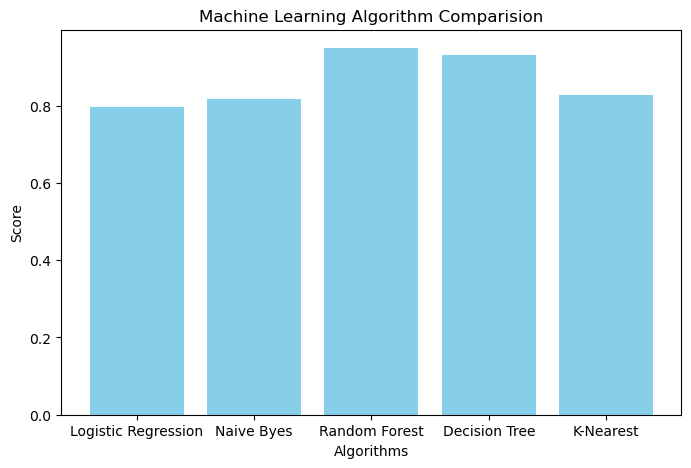

In [63]:
# Creating the bar chart
plt.figure(figsize=(8, 5))  
plt.bar(algorithms, scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Machine Learning Algorithm Comparision')
plt.show()

# Model Prediction

In [64]:
import joblib as jb

In [65]:
jb.dump(rfc,'Satisfaction_Predict')

['Satisfaction_Predict']

In [66]:
model=jb.load('Satisfaction_Predict')

In [67]:
#getting values from df - 1st row for accuracy check
df2=pd.DataFrame({
    'Customer Type':0,
    'Type of Travel':1,
    'Class':1,
    'Flight Distance':265,
    'Seat comfort':0,
    'Departure/Arrival time convenient':0,
    'Food and drink':0,
    'Inflight wifi service':2,
    'Inflight entertainment':4,
    'Online support':2,
    'Ease of Online booking':3,
    'On-board service':3,
    'Baggage handling':3,
    'Checkin service':5,
    'Cleanliness':3,
    'Age Group':1
},index=[0])

In [68]:
df2

,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Baggage handling,Checkin service,Cleanliness,Age Group
0,0,1,1,265,0,0,0,2,4,2,3,3,3,5,3,1


In [69]:
result=model.predict(df2)

In [70]:
if result ==1:
    print("Congratulation! Your Customer Is Satisfied")
else:
    print("Sorry... Your Customer Is dissatisfied")

Congratulation! Your Customer Is Satisfied


In [71]:
#Hence our predicting value and main value are equal/corrrect.